# Genetic algorithm 

## 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from operator import attrgetter

## 1.  read data in
- List of relative frequencies of techniques in X_small
- y_train to train the GA
- y_validation to later test the GA result

In [2]:
X.T

NameError: name 'X' is not defined

In [3]:
# read in excel with techniques and probabilities, sheet X removed latest 20%
X = pd.read_excel("../Data for algorithms.xlsx", sheet_name="X", index_col="ID")

# extract probabilities from excel and save as pd data frame
probs = pd.DataFrame(X.iloc[0])[1:]
probs

,prop
T1548.002,0.0047824
T1134,0.00167384
T1134.002,0.00167384
T1134.001,0.00143472
T1087.002,0.00215208
...,...
T1102,0.00047824
T1102.002,0.00502152
T1102.001,0.00167384
T1102.003,0.00071736


In [4]:
# read in excel with newest 20 percent of techniques for evaluation
y_train = pd.read_excel("../Data for algorithms.xlsx", sheet_name="Y", index_col="ID")
y_train = y_train.drop(y_train.tail(2).index, axis=0)
y_train = y_train.drop(['created'], axis = 1).T
y_train


ID,S0471,S0470,S0469,S0473,S0475,S0477,S0476,S0481,S0482,S0483,...,S0590,S0593,S0591,S0592,S0595,S0594,S0596,S0597,S0599,S0600
T1548.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1087.002,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
T1102.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# read correlation matrix
#corr_mat = pd.read_excel("../Data for algorithms.xlsx", sheet_name="X_phi_techniques")
#corr_mat = corr_mat.set_index("ID")
corr_mat = X.corr()
corr_mat

,T1548.002,T1134,T1134.002,T1134.001,T1087.002,T1087.003,T1087.001,T1071,T1071.004,T1071.002,...,T1078.003,T1125,T1497,T1497.001,T1497.003,T1102,T1102.002,T1102.001,T1102.003,T1047
T1548.002,1.000000,0.141401,0.229236,0.347270,0.194084,-0.025795,0.114904,0.089907,0.055471,-0.041135,...,0.089907,0.134809,0.063056,0.134809,-0.025795,-0.018189,-0.008821,0.053566,-0.022308,0.117351
T1134,0.141401,1.000000,0.271503,-0.018394,0.235099,-0.014976,0.265323,0.176950,-0.032415,-0.023882,...,-0.014976,0.045358,-0.018394,-0.036913,-0.014976,-0.010560,0.050678,-0.019896,-0.012951,0.150957
T1134.002,0.229236,0.271503,1.000000,0.138756,0.363961,-0.014976,0.188934,-0.014976,-0.032415,0.098542,...,-0.014976,0.127630,-0.018394,-0.036913,-0.014976,-0.010560,0.050678,-0.019896,-0.012951,0.084696
T1134.001,0.347270,-0.018394,0.138756,1.000000,0.118073,-0.013845,0.045196,0.193164,0.069602,-0.022079,...,0.193164,0.054611,-0.017005,0.232086,0.193164,-0.009763,-0.032512,-0.018394,-0.011974,0.027253
T1087.002,0.194084,0.235099,0.363961,0.118073,1.000000,-0.017030,0.292055,0.152716,0.126432,-0.027157,...,0.152716,0.030789,-0.020916,-0.041975,-0.017030,-0.012008,0.035935,-0.022624,-0.014727,0.180030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1102,-0.018189,-0.010560,-0.010560,-0.009763,-0.012008,-0.007949,-0.021355,-0.007949,-0.017205,-0.012676,...,-0.007949,-0.019592,-0.009763,-0.019592,-0.007949,1.000000,-0.018665,-0.010560,-0.006874,-0.025384
T1102.002,-0.008821,0.050678,0.050678,-0.032512,0.035935,-0.026471,0.063906,-0.026471,-0.057296,0.029918,...,-0.026471,0.080174,0.060079,0.128648,-0.026471,-0.018665,1.000000,0.136523,-0.022892,0.032586
T1102.001,0.053566,-0.019896,-0.019896,-0.018394,-0.022624,-0.014976,-0.040235,-0.014976,0.059899,-0.023882,...,-0.014976,-0.036913,0.138756,0.127630,-0.014976,-0.010560,0.136523,1.000000,-0.012951,0.018435
T1102.003,-0.022308,-0.012951,-0.012951,-0.011974,-0.014727,-0.009749,-0.026191,-0.009749,-0.021101,-0.015546,...,-0.009749,-0.024029,0.226724,-0.024029,-0.009749,-0.006874,-0.022892,-0.012951,1.000000,-0.031133


## Set global variables

In [6]:
population_size = 20 
maximum_generation = 300, 
prob_of_ones= 12.5 / len(probs) # 12.5 is mean of ones in X 

## 2. Create helper functions
- create_starting_population
- calculate_fitness
- select_individual_by_tournament
- select_individual_by_roulette
- breed_by_crossover_1point
- breed_by_crossover_2point
- breed_by_crossover_uniform
- randomly_mutate_population

In [7]:
# function to create a starting population by drawing zeros and ones randomly. Chance for ones is prob_of_ones
# individuals: int is number of individuals (=software) to be generated
# length_of_techniques: int
# percent_of_ones: float
def create_starting_population(individuals, length_of_techniques, prob_of_ones=prob_of_ones):
    
    size = (individuals, length_of_techniques)
    probability = np.array([ 1 - prob_of_ones, prob_of_ones])
    
    population = np.random.choice([0,1], size=size, p=probability)
    
    return population

In [8]:
#example starting population
print (create_starting_population(6, len(probs)) )

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [9]:
# function to calculate fitness of every individual in the current population
def calculate_fitness(individuals, probs, corr_mat, lamda_balance = 0.2, bonus_factor = 135, penalty_factor = 12, print_out = False):
    
    len_pop = len(probs)
    
    individuals = np.array(individuals) # individuals = 6x269
    probs = np.array(probs) # array with probabilities 269x1
    ones = np.ones(len_pop) # number of ones 269x1
    
    occurrences = (individuals @ ones) # number of ones in individual 6x1
    P = individuals # 6x269
    
    corr = np.array(corr_mat).reshape(len_pop,len_pop)
    np.fill_diagonal(corr, 0) # 269x269, correlation matrix with 0 self covariance
    A = (P @ corr) # 6x269
    K = (P @ A.T) # 6x6
    corr_term = K.diagonal()/len_pop # diagonal elements of matrix K 

    
    prob_term = (individuals @ probs) # a includes values between 0 and 1
#     expected_techniques = np.rint(np.random.normal(11,1))
#     if expected_techniques < 0:
#         expected_techniques = 0
    difference = (np.subtract(occurrences, 12.0)) # here random N(11, 6)

    pen_1 = (difference**2) * np.sign(difference)/penalty_factor
    pen_1[pen_1 < 0] = 0
    
    bonus = np.copy(difference)/bonus_factor
    bonus[bonus > 0] = 0
    penalty_term = (pen_1 + bonus)
        
    if print_out:
        print("prob_term")
        print(prob_term)
        print("")
        print(occurrences)
        print("difference")
        print(difference)
        print("penalty_term")
        print(penalty_term)
        print("corr_term")
        print(corr_term)
        print("len_pop")
        print(len_pop)
        print("")
        
    fitness_scores = ((lamda_balance * prob_term.T + corr_term * (1-lamda_balance)) - penalty_term)
    return fitness_scores[0]

In [10]:
testPop = create_starting_population(6, len(probs))
print('Startpopulation')
print(testPop)

calculate_fitness(testPop, probs, corr_mat, print_out = True)

Startpopulation
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
prob_term
[[0.0389765662362506]
 [0.13103778096604496]
 [0.04447632711621234]
 [0.11645145863223338]
 [0.08871353419416546]
 [0.08488761358201818]]

[ 7. 18. 10. 12. 15. 13.]
difference
[-5.  6. -2.  0.  3.  1.]
penalty_term
[-0.03703704  3.         -0.01481481  0.          0.75        0.08333333]
corr_term
[0.01388671 0.08297823 0.01312569 0.02070128 0.03956964 0.02884239]
len_pop
192



array([0.05594172209271534, -2.907409862895584, 0.03421063598833872,
       0.03985131743775373, -0.7006015811360069, -0.04328190164183862],
      dtype=object)

In [11]:
#function to select individuals by using tournament selection
def select_individual_by_tournament(population, scores):
    # get population size
    population_size = len(scores)

    # pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    # get fitness score for each individual
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
    # identify undividual with highest fitness
    # fighter 1 will win if scores are equal
    if fighter_1_fitness >= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    #return the chromsome of the winner
    return population[winner, :]

In [12]:
#select_individual_by_tournament(testPop, calculate_fitness(testPop, probs, corr_mat))

In [13]:
# function to select individuals by using roulette wheel selection

def select_individual_by_roulette(population, k): # list of individuals to select from, number of individuals to select, attribute to use as selection criteria
    scores = calculate_fitness(population, probs, corr_mat)
    # population vectors convert to the same chromosome and therefore the fitness values convert to the same values
    scores_list = []
    scores_normalized = scores -min(scores)
    if scores_normalized.sum() != 0:
        for i in range(len(population)):
            fitness_sc = scores_normalized[i]
            scores_list.append((i, fitness_sc))
    # if sum of normalized fittnes scores is 0 => all fittness scores are the same => uniform distribution
    else:
        for i in range(len(population)): #Gleichverteilung
            fitness_sc = 1/len(population)
            scores_list.append((i, fitness_sc))
            
    scores_df = pd.DataFrame(scores_list, columns =["Index", "Fitness"])
    
    scores_df["Fitness"] = scores_df["Fitness"]/scores_df["Fitness"].sum()

    chosen = np.random.choice(scores_df["Index"], size = k, p = scores_df["Fitness"].fillna(0))
    winner1 = population[chosen[0], :]
    winner2 = population[chosen[1], :]

    return winner1, winner2

In [14]:
# function for executing one point crossover
def breed_by_crossover_1point(ind1, ind2):
    chromosome_length = min(len(ind1), len(ind2))
    crossover_point = random.randint(1, chromosome_length-1)
    
    ind1[crossover_point:], ind2[crossover_point:] = ind2[crossover_point:], ind1[crossover_point:]
    
    return ind1, ind2

In [15]:
# function for executin two point crossover
def breed_by_crossover_2point(ind1, ind2):
    chromosome_length = min(len(ind1), len(ind2))
    crossover_point1 = random.randint(1, chromosome_length)
    crossover_point2 = random.randint(1, chromosome_length-1)
    
    if crossover_point2 >= crossover_point1:
        crossover_point2 += 1
    else: # swapping the two crossover points
        crossover_point1, crossover_point2 = crossover_point2, crossover_point1
        
    ind1[crossover_point1: crossover_point2], ind2[crossover_point1: crossover_point2] \
        = ind2[crossover_point1: crossover_point2], ind1[crossover_point1: crossover_point2]
    
    return ind1, ind2

In [16]:
# function for executing uniform crossover
def breed_by_crossover_uniform(ind1, ind2, indpb):
    # parameter indpb is the indipendent probability for each bit to be exchanged
    # get length of chromosome
    chromosome_length = min(len(ind1), len(ind2))
    
    for i in range(chromosome_length):
        if random.random() < indpb: #add: lower probability that 0 --> 1 than the probability that 1 --> 0
             ind1[i], ind2[i] = ind2[i], ind1[i]
    return ind1, ind2

In [17]:
# function to mutate population
def randomly_mutate_population(population, mutation_probability):
    
    # apply random mutation
        random_mutation_array = np.random.random(
            size=(population.shape))
        
        random_mutation_boolean = \
            random_mutation_array <= mutation_probability

        population[random_mutation_boolean] = \
        np.logical_not(population[random_mutation_boolean])
        
        # return mutation population
        return population

In [18]:
import operator
# class to combine scores, occurrences and population
class result:
    def __init__(self, score, occurences, population):
        self.score = score
        self.occurences = occurences
        self.population = population

## 3. Run Genetic Algorithm

In [19]:
# main algorithm code
# set general parameters

# toDo, choose cross alogrithm
def run_ga(probs, corr_mat, population_size = 20, maximum_generation = 300, mutation_rate =0.001, lamda_balance = 0.2, bonus_factor = 135, penalty_factor = 12, set_seed=False, print_out=False):
    if set_seed:
        random.seed(42)
        np.random.seed(42)
    
    chromosome_length = len(probs)
    best_score_progress = [] # tracks progress

    # create starting population
    population = create_starting_population(population_size, chromosome_length)

    # print (population)
    # display best score in starting population
    scores = calculate_fitness(population, probs, corr_mat, lamda_balance = lamda_balance, bonus_factor = bonus_factor, penalty_factor = penalty_factor)
    best_score = np.max(scores)

    if print_out:
        print ('Starting best score: %.1f' %best_score)

    # add starting best score to progress tracker
    best_score_progress.append(best_score)

    # going through the generations of genetic algorithm
    for generation in range(maximum_generation):
        # create an empty list for new population
        new_population = []

        # create new popualtion generating two children at a time
        for i in range(int(population_size/2)):
            parent1 = select_individual_by_tournament(population, scores)
            parent2 = select_individual_by_tournament(population, scores)
            #parent1, parent2 = select_individual_by_roulette(population, 2)
            #child_1, child_2 = breed_by_crossover_1point(parent_1, parent_2)
            #child_1, child_2 = breed_by_crossover_2point(parent_1, parent_2) # Results are not as promising as with the others
            child_1, child_2 = breed_by_crossover_uniform(parent1, parent2, 0.5)
            new_population.append(child_1)
            new_population.append(child_2)

        # replace the old population with the new one
        population = np.array(new_population)

        # apply mutation
        population = randomly_mutate_population(population, mutation_rate)

        # score best solution, and add to tracker
        scores = calculate_fitness(population, probs, corr_mat, lamda_balance = lamda_balance, bonus_factor = bonus_factor, penalty_factor = penalty_factor)
        best_score = np.max(scores)
        best_score_progress.append(best_score)

        # print(best_score)

    # GA has completed required generation number

    ones = np.ones(len(probs)) # number of ones 269x1
    occurrences = (population @ ones)
    if print_out:
        print ('End best score %.1f' %best_score)
        print (occurrences)

        # plot progress
        %matplotlib inline
        plt.plot(best_score_progress)
        plt.xlabel('Generation')
        plt.ylabel('Best score (% target)')
        plt.show()
        
        # Print out information about best individuum
        print('Best score target generation: %.1f' %best_score)
        
    max_index_row = np.argmax(scores, axis=0)
    
    if print_out:
        print ('Position in Array:', max_index_row)
        print("Number of Ones:", occurrences[max_index_row])
        print("")
        print("Respective Chromosome:", population[max_index_row] )
        print("")

        print("Techniques used:")
        i = 0
        for row in probs.index: 
            if population [max_index_row][i] == 1:
                print(row)
            i+=1

    best_sw = np.tile(population[max_index_row],1) 
       
    
    
    # sort attribute scores in order to select best X individuums for evaluation
    results = []
    for i in range(0,len(scores)):
    #    print(i)
        r1 = result(scores[i], occurrences[i], population[i])
        results.append(r1)
 

    sorted_results = sorted(results, key=operator.attrgetter('score'))
    predi = sorted_results[-1]
    
    #print("predi")
    #print(predi)
    #print(type(predi))
    
    
    #return sorted_results, best_sw
    F1, softwareIndex, generatedSoftware = calculate_F_score(y_train, predi.population, do_print=False)
    return F1, softwareIndex, generatedSoftware

Starting best score: 0.1
End best score 0.1
[12. 12. 13. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 14. 13. 13. 12.
 12. 12.]


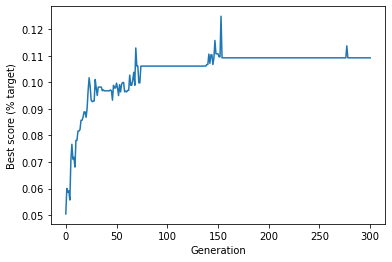

Best score target generation: 0.1
Position in Array: 17
Number of Ones: 12.0

Respective Chromosome: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1]

Techniques used:
T1134
T1547.001
T1555.003
T1083
T1105
T1056.001
T1135
T1012
T1016
T1049
T1550.002
T1047


NameError: name 'calculate_F_score' is not defined

In [20]:
#sorted_results, best_sw = run_ga(probs, corr_mat, print_out=True)
run_ga(probs, corr_mat, print_out=True, set_seed=True)

## 4. evaluate result of GA

In [39]:
# read in the y_train data set and the predicted software

def calculate_F_score(y_train: pd.DataFrame, predicted_sw: np.array, do_print=False):    
    #print(type(y_train), type(predicted_sw))
    assert y_train.shape[0] == predicted_sw.shape[0]
    
    ones = np.ones(len(y_train))

    occurences = np.array(predicted_sw).T @ ones
    
    F1_list = []
    Software_index = 0
    
    for software in y_train.columns:
        sum_s = y_train[software] @ predicted_sw

        precision = 0
        if occurences != 0:
            precision = sum_s/occurences
        
        number_of_techniques_y = y_train[software] @ ones
        recall = 0
        if number_of_techniques_y != 0:
            recall = sum_s/(number_of_techniques_y)
        F1 = 0
        if (precision + recall) != 0:
            F1 = 2 * precision* recall /(precision + recall)
            
        F1_list.append(F1)
    
    return max(F1_list), F1_list.index(max(F1_list)) ,predicted_sw

In [206]:
# calculate_F_score(y_train, sorted_results[0].population)

## 5. Helper functions optimizer

In [34]:
lamda_balance = 0.2 # 0 - 0.5
bonus_factor = 135 # +-20
penalty_factor = 12 #+- 5
mutation_rate =0.001 # to optimise

startValues = [lamda_balance, bonus_factor, penalty_factor, mutation_rate]
startValues

[0.2, 135, 12, 0.001]

In [35]:
lowerBound = [0.01, 115, 7, 0.0008]
upperBound = [0.99, 155, 12, 0.0012]

bounds = tuple((lowerBound[x], upperBound[x]) for x in range(0,len(startValues)))
bounds

((0.01, 0.99), (115, 155), (7, 12), (0.0008, 0.0012))

In [36]:
def GA_func(params):
    assert len(params) == 4
    lamda_balance = params[0]
    bonus_factor = params[1]
    penalty_factor = params[2]
    mutation_rate = params[3]
    # ein bester F1 score optimieren ist noch nicht finales Ziel
    F1, F1_index, generated_software = run_ga(probs, corr_mat, population_size = 20, maximum_generation = 30, mutation_rate=mutation_rate, lamda_balance = lamda_balance, bonus_factor = bonus_factor, penalty_factor = penalty_factor, set_seed=True, print_out=False)
    return - F1

In [37]:
def GA_30iteration(params):
    examples_to_save = 30
    F1_values = pd.DataFrame([])

    for i in range(examples_to_save):
        F1, F1_index, generated_software = GA_func_without_seed(params)
        F1_values[f"software_{i}"] = np.array([F1])
        #print(F1)
    
    mean = pd.DataFrame(F1_values).T[0].describe()[1]
    return -mean

In [42]:
GA_func(startValues)

-0.41379310344827586

In [43]:
GA_30iteration(startValues)

-0.37468307175437915

## 6. Optimize hyper-parameter of model
#### 6.1 local optimizer "L-BFGS-B"

In [29]:
import scipy.optimize as sco
minimize = sco.minimize(GA_func, x0=startValues, bounds=bounds, method="L-BFGS-B", options={"gtol": 1e-12, "ftol":1e-12})
minimize.x

NameError: name 'calculate_F_score' is not defined

#### 6.2 global optimizer

In [ ]:
dual_annealing = sco.dual_annealing(GA_30iteration, x0=startValues, bounds=bounds, maxiter=30)

In [30]:
dual_annealing.x #[7.86555160e-01, 1.18671590e+02, 1.06715895e+01, 1.01544190e-03], [6.73360781e-01, 1.21289711e+02, 9.73594655e+00, 9.69407589e-04]

NameError: name 'dual_annealing' is not defined

In [31]:
GA_30iteration(dual_annealing.x) 

NameError: name 'dual_annealing' is not defined

## 7.  Save series of generated softwares

In [32]:
def GA_func_without_seed(params):
    assert len(params) == 4
    lamda_balance = params[0]
    bonus_factor = params[1]
    penalty_factor = params[2]
    mutation_rate = params[3]
    # ein bester F1 score optimieren ist noch nicht finales Ziel
    return run_ga(probs, corr_mat, population_size = 20, maximum_generation = 30, mutation_rate=mutation_rate, lamda_balance = lamda_balance, bonus_factor = bonus_factor, penalty_factor = penalty_factor, print_out=False)

In [ ]:
examples_to_save = 30
df_to_save = pd.DataFrame([])
F1_values = pd.DataFrame([])
maxIndexValues = pd.DataFrame([])
for i in range(examples_to_save):
    F1, maxIndex, generated_software = GA_func_without_seed(dual_annealing.x) #dual_annealing.x
    # y-train muss hinzugefügt werden!!!!!!!!!
    df_to_save[f"software_{i}"] = generated_software
    print(F1)
    F1_values[f"software_{i}"] = np.array([F1])
    maxIndexValues[f"software_{i}"] = np.array([maxIndex])

print("")
print(pd.DataFrame(F1_values).T[0].describe()[1])
maxIndexValues

In [224]:
F1_values

,software_0,software_1,software_2,software_3,software_4,software_5,software_6,software_7,software_8,software_9,software_10,software_11,software_12,software_13,software_14,software_15,software_16,software_17,software_18,software_19
0,0.434783,0.666667,0,0,0.4,0.666667,0.142857,0,0.583333,0.555556,0.428571,0.4,0.608696,0.363636,0.380952,0.5,0.533333,0.5,0.470588,0.4


In [226]:
df_to_save.append(F1_values).append(maxIndexValues).to_excel('output4.xlsx', engine='xlsxwriter')